<a href="https://colab.research.google.com/github/BM304/DA_Homeworks/blob/main/lesson4_hometask_belonenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

**Основная часть**

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

**Описания полей**
* age возраст
* gender пол repexc_date
* city_type Тип города проживания клиента
* full_mob Длительность взаимоотношений с банком
* ml_balance ипотека
* cl_balance_0m потребительский кредит
* loan_balance_0m все кредиты
* td_balance_0m депозит
* casa_balance_0m счета
* dc_trx_cnt количество трат по картам
* dc_trx_sum сумма трат по картам
* Avg_trx средний размер транзакции
* avgtrx_to_balance
* min_casa_balance_1q показатели по счетам за квартал
* max_casa_balance_1q
* avg_casa_balance_1Y показатели по счетам за год
* min_td_balance_1q
* max_td_balance_1q
* avg_td_balance_1Y
* min_loan_balance_1q
* max_loan_balance_1q
* avg_loan_balance_1Y
* min_cl_balance_1q
* max_cl_balance_1q
* avg_cl_balance_1Y
* loan_to_deposit
* income доход клиента

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
from scipy import stats
from tqdm.auto import tqdm
import csv
import sys
from collections import Counter
csv.field_size_limit(sys.maxsize)


9223372036854775807

In [3]:
# подключем гугл диск для работы
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# считываем файл в дата фрейм
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/test_cluster.csv', encoding='cp1251', sep=';')
df.iloc[:10]


,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.000000e+00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3.272937e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6.249755e+03,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,1.435494e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,9.151177e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.0,0.00,0.0,9.369080e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.0,0.00,0.0,5.350795e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.0,0.00,0.0,4.783591e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.0,0.00,0.0,2.919013e+06,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.000000e+00,83,...,32413.52,34119.49,38051.374167,0.0,0.0,0.0,NaN,3915.032892,4.383411,6065.052515


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

Основная часть

Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly


Используйте также описательные статистики


У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

---
> **Анализируем вопрос кредитования** 
1. Разделение по гендерному признаку - кто чаще всего берет кредиты, мужчины или женщины? 
---

In [62]:
# создаем дата фрейм с теми данными, которые нам нужны под задачу
df_list = df[['age','gender','loan_balance_0m','income']].copy()
df_list.iloc[:2]

,age,gender,loan_balance_0m,income
0,71,NaN,0.0,0.0
1,49,NaN,0.0,0.0


In [63]:
df_credit=df_mortgager.loc[df_mortgager['loan_balance_0m'] !=0]
df_credit.iloc[:2]

,age,gender,loan_balance_0m,income
9,36,М,32413.52,22100.00
10,56,F,61189.99,36694.37


In [92]:
#Корректируем индекс
df_credit2 = df_credit.reset_index(drop=True)
df_credit2.iloc[:2]

,age,gender,loan_balance_0m,income
0,36,М,32413.52,22100.00
1,56,F,61189.99,36694.37


In [65]:
# группируем данные по гендерному признаку
df_gr=df_credit2.groupby('gender', as_index=False).count()[['gender','loan_balance_0m']]
df_gr.iloc[:2]


,gender,loan_balance_0m
0,F,5062
1,М,6059


In [66]:
# рисуем график
fig = px.bar(x=df_gr.gender.to_list(),
             y=df_gr.loan_balance_0m.to_list(), 
             labels={'x':'Гендер', 'y':'Количество взятых кредитов'})
fig.show()

---
2. Каков возраст клиентов, выплачивающих кредиты?*
---
*Показать какой процент мужчин и женщин берет кредит в возрасных диапозонах 
- до 25
- 26-35
- 36-45
- после 46

In [116]:
# возрастные категории мужчин и женщин
def category(age):
    
    if age < 26:
        return '1 группа  до 25'
    elif age < 35:
        return '2 группа  26-35'
    elif age < 46:
        return '3 группа 36-45'
    elif age > 46:
        return '4 группа после 46'

In [117]:
 df_credit2['category'] = df_credit2['age'].apply(category)

In [118]:
# проверка
df_credit2.iloc[:5]

,age,gender,loan_balance_0m,income,category
0,36,М,32413.52,22100.00,3 группа 36-45
1,56,F,61189.99,36694.37,4 группа после 46
2,50,F,521337.41,385000.00,4 группа после 46
3,28,М,179900.88,0.00,2 группа 26-35
4,30,F,25399.19,27448.61,2 группа 26-35


In [119]:
# группируем данные по возрастной категории для женщин 
df_credit2_F=df_credit2.loc[df_credit2['gender'] =='F']

df_gr2=df_credit2_F.groupby('category', as_index=False).count()[['category','gender']]
df_gr2.iloc[:5]


,category,gender
0,1 группа до 25,141
1,2 группа 26-35,1112
2,3 группа 36-45,1756
3,4 группа после 46,1912


In [120]:
# группируем данные по возрастной категории для мужчин 
df_credit2_M=df_credit2.loc[df_credit2['gender'] =='М']

df_gr3=df_credit2_M.groupby('category', as_index=False).count()[['category','gender']]
df_gr3.iloc[:5]


,category,gender
0,1 группа до 25,195
1,2 группа 26-35,1600
2,3 группа 36-45,2137
3,4 группа после 46,1953


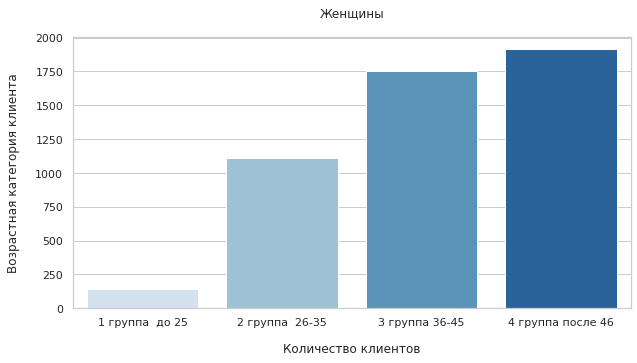

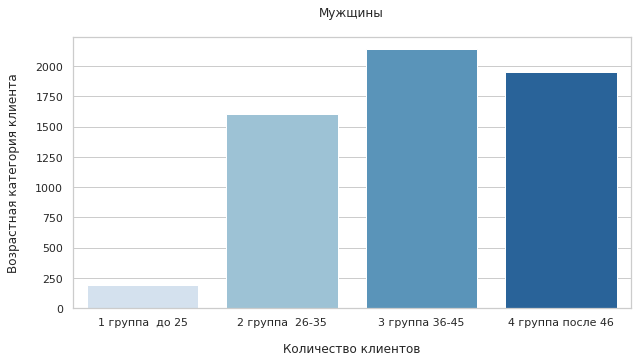

In [124]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = df_gr2,
            x = 'category', 
            y = 'gender',
            palette = 'Blues')

plt.title('Женщины', pad=20)
plt.xlabel('Количество клиентов', labelpad = 15)
plt.ylabel('Возрастная категория клиента', labelpad = 15)
plt.show();

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = df_gr3,
            x = 'category', 
            y = 'gender',
            palette = 'Blues')

plt.title('Мужщины', pad=20)
plt.xlabel('Количество клиентов', labelpad = 15)
plt.ylabel('Возрастная категория клиента', labelpad = 15)
plt.show();



---
3. Средний доход мужчин или женщин выше при взятии кредита?
---

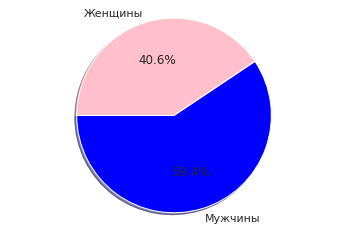

In [136]:
mean_of_column_M = df_credit2_M['income'].mean()
mean_of_column_F = df_credit2_F['income'].mean()


labels = ['Мужчины','Женщины']
values = [mean_of_column_M,mean_of_column_F]
colors = ['blue','pink']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

Итог. Портрет заёмщика. 

Наиболее популярны кредиты среди мужчин в возрасте 36-45 лет, женщины же предпочитают брать кредиты после 46 лет.
Средння доходность мужчин, берущих кредиты выше чем у женщин. 